# Battery Energy Storage System (BESS) State of Charge (SOC)

In [1]:
from opender import DER, DER_BESS
import matplotlib.pyplot as plt

In [2]:
# Create a 100kW BESS DER object with 100kWh energy capacity, the SOC initial value is 50%
der_obj = DER_BESS()
der_obj.der_file.NP_P_MAX = 100000
der_obj.der_file.NP_BESS_CAPACITY = 100000
der_obj.der_file.SOC_INIT = 0.5

In [3]:
der_obj.der_file.NP_BESS_P_MAX_BY_SOC ={
    'SOC_P_DISCHARGE_MAX': [0.02, 0.05, 0.1],  # Configure the BESS to have less discharging capability when SOC is less than 0.1
    'P_DISCHARGE_MAX_PU': [0, 0.2, 1],         # When SOC is at 5%, discharge power drop to 0.2. When SOC is at 2%, no discharge capability
    'SOC_P_CHARGE_MAX': [0.9, 0.95, 0.98],     # Configure the BESS to have less charging capability when SOC is above than 90%
    'P_CHARGE_MAX_PU': [1, 0.2, 0],            # When SOC is at 95%, charge power drop to 0.2. When SOC is at 98%, no charge capability
}

In [4]:
# Configure time series (dynamic) simulation timestep
t_s = 60
DER.t_s = t_s
t = 0

In [5]:
# Prepare arrays for plotting
t_plot = []
p_plot = []
p_dem_plot = []
soc_plot = []

In [6]:
# Simulate for 3 hours
while t < 3 * 60 * 60:
    
    if t < 3600:
        p_dem_pu = 1
    else:
        p_dem_pu = -1
    
    # Calculate DER output current
    der_obj.update_der_input(v_pu = 1, p_dem_pu = p_dem_pu, f = 60)
    der_obj.run()

    # save result
    t_plot.append(t)
    p_plot.append(der_obj.p_out_pu)
    p_dem_plot.append(p_dem_pu)
    soc_plot.append(der_obj.get_bess_soc())

    # increase t
    t = t + t_s

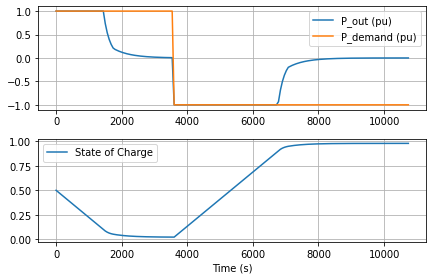

In [7]:
# plot figure
fig = plt.figure()
plt.clf()
ax1=plt.subplot(2, 1, 1)
plt.plot(t_plot, p_plot, label='P_out (pu)')
plt.plot(t_plot, p_dem_plot, label='P_demand (pu)')
plt.grid()
plt.legend()
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(t_plot, soc_plot, label='State of Charge')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

* Before BESS SOC drops to 10%, BESS is able to carry out the active power demand to discharge at 1pu
* When SOC is below 10%, active power is reduced due to contraint. SOC drains slower
* When SOC reaches 2%, BESS has no capability to discharge further. Active power is 0
* For charging, before SOC goes up to 90%, BESS is able to carry out the active power demand at -1pu (charging)
* When SOC is above 90%, active power is reduced due to contraint. SOC charges slower
* When SOC reaches 98%, BESS has no capability to charge further. Active power is 0